In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/german-car-insights/gcar_data.csv


In [3]:
data=pd.read_csv('/kaggle/input/german-car-insights/gcar_data.csv')

In [4]:
data.head(5)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [5]:
data.isna().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
offer_description               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km             99932 non-null   fl

In [7]:
data.nunique()

Unnamed: 0                  100000
brand                           29
model                          590
color                           14
registration_date              369
year                            49
price_in_euro                11652
power_kw                       490
power_ps                       480
transmission_type                4
fuel_type                       54
fuel_consumption_l_100km       404
fuel_consumption_g_km          937
mileage_in_km                34479
offer_description            79777
dtype: int64

In [8]:
data.rename(columns={col: col.replace(' ', '') for col in data.columns}, inplace=True)

In [9]:
data.columns

Index(['Unnamed:0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

**Preprocessing**

In [10]:
data.drop(['Unnamed:0','offer_description'],axis=1,inplace=True)
data.head(5)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0


In [11]:
data.describe()

,mileage_in_km
count,9.993200e+04
mean,8.559891e+04
std,7.929713e+04
min,0.000000e+00
25%,2.550000e+04
50%,6.800000e+04
75%,1.270000e+05
max,3.800000e+06


****cleaning and handle missing values****

In [12]:
for c in data.columns:
   miss=data[c].isnull().sum()
   if miss>0:
    print("{} has {} missing value".format(c,miss))

color has 76 missing value
registration_date has 1 missing value
power_kw has 75 missing value
power_ps has 72 missing value
fuel_consumption_l_100km has 11239 missing value
mileage_in_km has 68 missing value


In [13]:
miss_value=data[pd.isnull(data['fuel_consumption_l_100km'])]
miss_value['fuel_type'].value_counts()

fuel_type
Petrol           4920
Diesel           2986
Electric         2266
Hybrid            761
LPG               164
Unknown            45
Other              41
Hydrogen           24
Diesel Hybrid      14
CNG                13
Ethanol             5
Name: count, dtype: int64

In [14]:
condition=pd.isnull(data['fuel_consumption_l_100km'])
data.loc[condition,'fuel_consumption_l_100km']=str('0')

In [15]:
data.dropna(inplace=True)

In [16]:
condition=data[data['fuel_consumption_l_100km'].str.contains('-')]['fuel_consumption_l_100km'].index
data.drop(index=condition,inplace=True)
condition=data[data['fuel_consumption_g_km'].str.contains('-')]['fuel_consumption_g_km'].index
data.drop(index=condition,inplace=True)


condition=data[data['fuel_consumption_l_100km'].str.contains('Diesel')]['fuel_consumption_l_100km'].index
data.drop(index=condition,inplace=True)


condition=data[data['fuel_consumption_g_km'].str.contains('Petrol')]['fuel_consumption_g_km'].index
data.drop(index=condition,inplace=True)

In [17]:
data['fuel_consumption_l_100km']=(data['fuel_consumption_l_100km'].str.split(' ').str[0].str.replace(',','.')).astype(float)
data['fuel_consumption_g_km']=(data['fuel_consumption_g_km'].str.split(' ').str[0].str.replace(',','.')).astype(float)

In [18]:
data['power_kw']=(data['power_kw'].str.split(' ').str[0].str.replace(',','.')).astype(float)
data['power_ps']=(data['power_ps'].str.split(' ').str[0].str.replace(',','.')).astype(float)

In [19]:
def is_canot_float_convertible(value):
    try:
        float(value)
        return False
    except (ValueError, TypeError):
        return True

In [20]:
condition = data[data['price_in_euro'].apply(is_canot_float_convertible)].index
data.drop(index=condition,inplace=True)

condition = data[data['year'].apply(is_canot_float_convertible)].index
data.drop(index=condition,inplace=True)

In [21]:
data['price_in_euro']=data['price_in_euro'].astype(float)
data['year']=data['year'].astype(int)

In [22]:
data_model=data.pivot_table(
    values=['power_kw','power_ps','fuel_consumption_l_100km', 'fuel_consumption_g_km']
    , index =['brand','fuel_type'], aggfunc='mean')

In [23]:
data_model

fuel_consumption_g_km  fuel_consumption_l_100km  \
brand        fuel_type                                                    
alfa-romeo   Diesel                136.732733                  5.085285   
             Hybrid                109.747368                  4.233684   
             Petrol                175.886650                  7.604912   
aston-martin Petrol                291.873832                 12.737383   
audi         CNG                   121.506452                  5.174194   
...                                       ...                       ...   
mazda        Diesel                135.520690                  5.026379   
             Electric                0.000000                  0.000000   
             Hybrid                119.500000                  5.250000   
             LPG                   139.000000                  6.000000   
             Petrol                141.339326                  6.033858   

                          power_kw    power_ps  
brand        fuel_type                          
alfa-romeo   Diesel     132.375375  179.813814  
             Hybrid     134.157895  182.494737  
             Petrol     170.151134  231.401763  
aston-martin Petrol     392.014019  533.102804  
audi         CNG        107.064516  145.612903  
...                            ...         ...  
mazda        Diesel     115.301724  156.955172  
             Electric    66.000000   90.000000  
             Hybrid     111.000000  150.500000  
             LPG        121.000000  165.000000  
             Petrol     102.294382  139.198502  

[130 rows x 4 columns]

In [24]:
for index,row in data.iterrows():


  if row['fuel_consumption_l_100km']==0:
    data.loc[index,'fuel_consumption_l_100km']=data_model.loc[row['brand'],'fuel_consumption_l_100km'][row['fuel_type']]


In [25]:
data.describe()

,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,83513.000000,8.351300e+04,83513.000000,83513.000000,83513.000000,83513.000000,8.351300e+04
mean,2016.920300,2.958110e+04,138.291452,188.101517,7.542485,148.152647,7.928011e+04
std,4.917162,4.616251e+04,80.669131,109.659161,19.881944,66.036379,7.542339e+04
min,1995.000000,2.500000e+02,5.000000,7.000000,0.000000,0.000000,0.000000e+00
25%,2014.000000,1.350000e+04,88.000000,120.000000,5.000000,119.000000,2.175000e+04
50%,2018.000000,2.099000e+04,110.000000,150.000000,5.800000,139.000000,6.250000e+04
75%,2020.000000,3.299000e+04,155.000000,211.000000,7.000000,170.000000,1.179000e+05
max,2023.000000,5.890500e+06,735.000000,999.000000,739.000000,999.000000,3.800000e+06


In [26]:
data['registration_date']=data['registration_date'].str.split('/').str[0].astype(int)
data=data.rename(columns={'registration_date':'month'})

In [27]:
data.duplicated().sum()

2882

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data

,brand,model,color,month,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,5,2023,38490.0,140.0,190.0,Automatic,Hybrid,5.40000,124.0,100.0
1,hyundai,Hyundai i10,black,9,2018,11555.0,49.0,67.0,Manual,Petrol,4.60000,106.0,27782.0
2,audi,Audi Q4 e-tron,grey,5,2021,48886.0,125.0,170.0,Automatic,Electric,5.12963,0.0,4247.0
3,honda,Honda CR-V,red,7,2018,24490.0,114.0,155.0,Automatic,Petrol,7.50000,175.0,57000.0
4,kia,Kia Sportage,black,2,2023,34990.0,110.0,150.0,Manual,Petrol,5.90000,150.0,7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,audi,Audi A1,blue,5,2012,12599.0,90.0,122.0,Manual,Petrol,5.30000,126.0,148000.0
99996,fiat,Fiat 500,black,12,2019,9999.0,51.0,69.0,Automatic,Petrol,5.20000,120.0,31698.0
99997,honda,Honda CR-V,brown,1,2019,24800.0,127.0,173.0,Manual,Petrol,6.30000,143.0,77900.0
99998,alfa-romeo,Alfa Romeo Giulietta,grey,12,2020,22990.0,125.0,170.0,Automatic,Diesel,5.50000,145.0,52251.0


**Exploratiry Data Analysis**

In [30]:
avargre_numirces_per_brand=data.pivot_table(values=['power_kw','power_ps','fuel_consumption_l_100km','fuel_consumption_g_km'],index=['brand'],aggfunc='mean')
avargre_numirces_per_brand

,fuel_consumption_g_km,fuel_consumption_l_100km,power_kw,power_ps
brand,,,,
alfa-romeo,160.643590,6.868038,157.915385,214.716239
aston-martin,291.765258,13.330394,391.436620,532.319249
audi,153.830968,6.333206,160.603129,218.444742
bentley,281.476688,12.949681,417.298995,567.359296
bmw,152.747779,9.236317,165.291240,224.829919
cadillac,247.909091,9.724770,215.972727,293.745455
chevrolet,222.173469,9.366445,243.602041,331.357143
chrysler,287.062500,9.037500,213.750000,290.687500
citroen,120.230646,6.663515,88.263390,120.124449


/tmp/ipykernel_18/3784194042.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/3784194042.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/3784194042.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/3784194042.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)


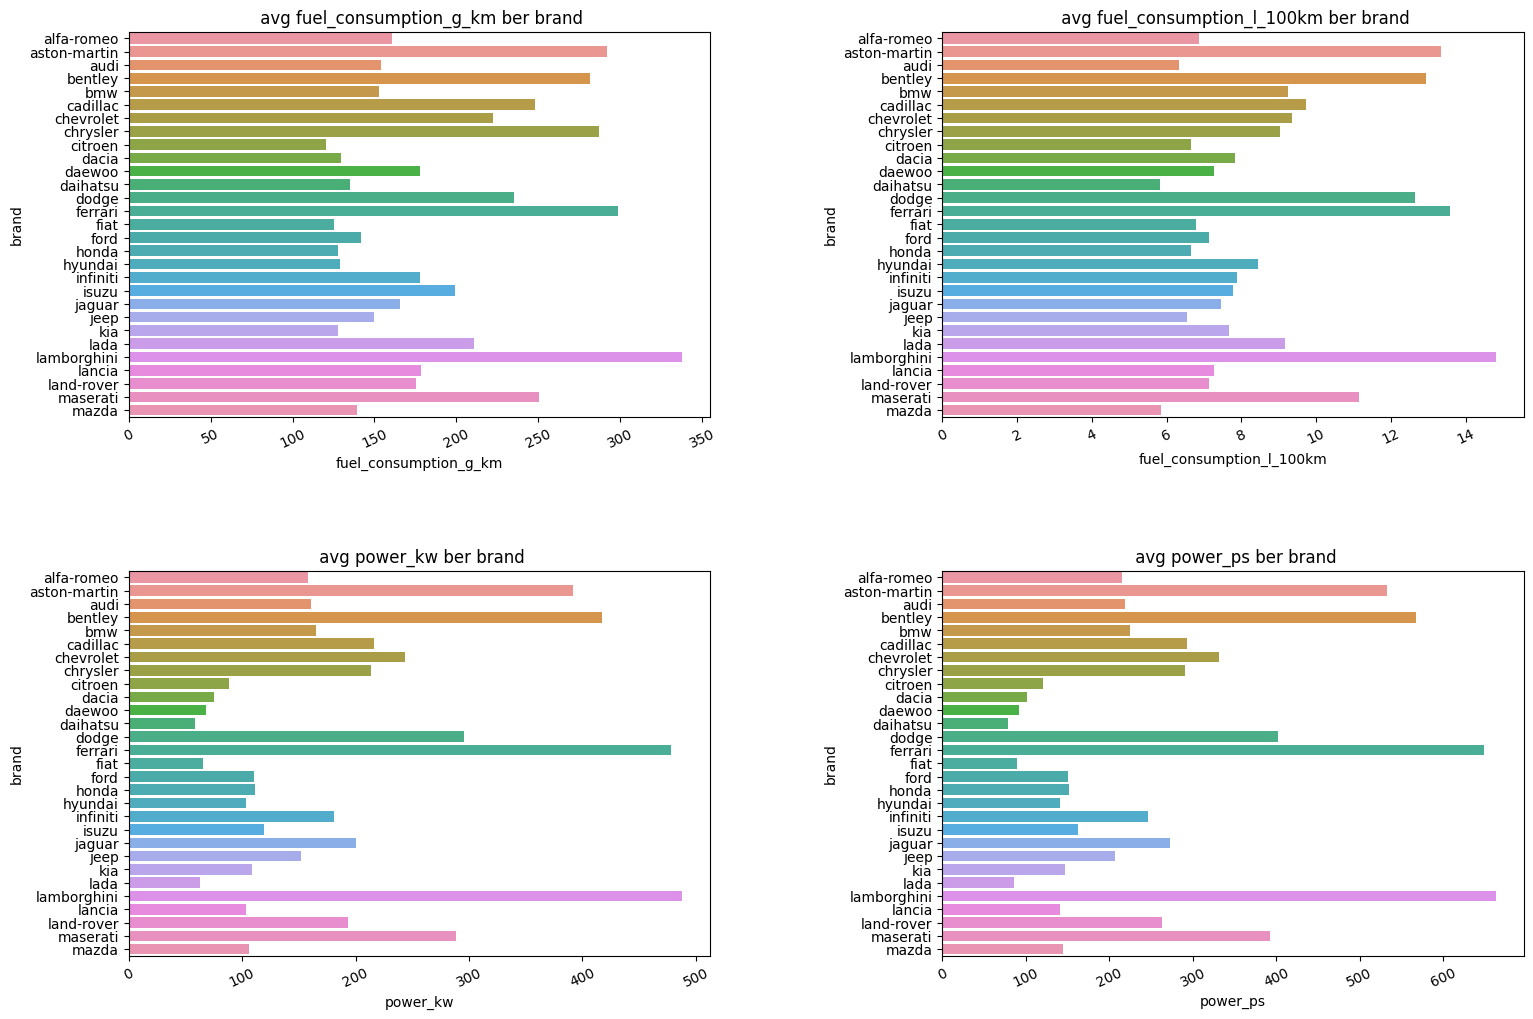

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))


s_axes=axes.flatten()
c_axes=0

for i in avargre_numirces_per_brand.columns:
  sns.barplot(data=avargre_numirces_per_brand,y=avargre_numirces_per_brand.iloc[:,:0].index,x=i,ax=s_axes[c_axes]);
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
  s_axes[c_axes].set_title(f' avg {i} ber brand')
  c_axes+=1

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
plt.close()

In [32]:
avargre_numirces_per_transmission_type=data.pivot_table(values=['power_kw','power_ps','fuel_consumption_l_100km','fuel_consumption_g_km'],index=['transmission_type'],aggfunc='mean')
avargre_numirces_per_transmission_type

,fuel_consumption_g_km,fuel_consumption_l_100km,power_kw,power_ps
transmission_type,,,,
Automatic,159.371846,8.968609,176.407565,239.894960
Manual,135.099588,5.919555,94.937242,129.191802
Semi-automatic,193.750000,8.126289,176.312500,239.718750
Unknown,147.369973,9.971607,134.978552,183.600536


/tmp/ipykernel_18/1723286101.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/1723286101.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/1723286101.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/1723286101.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)


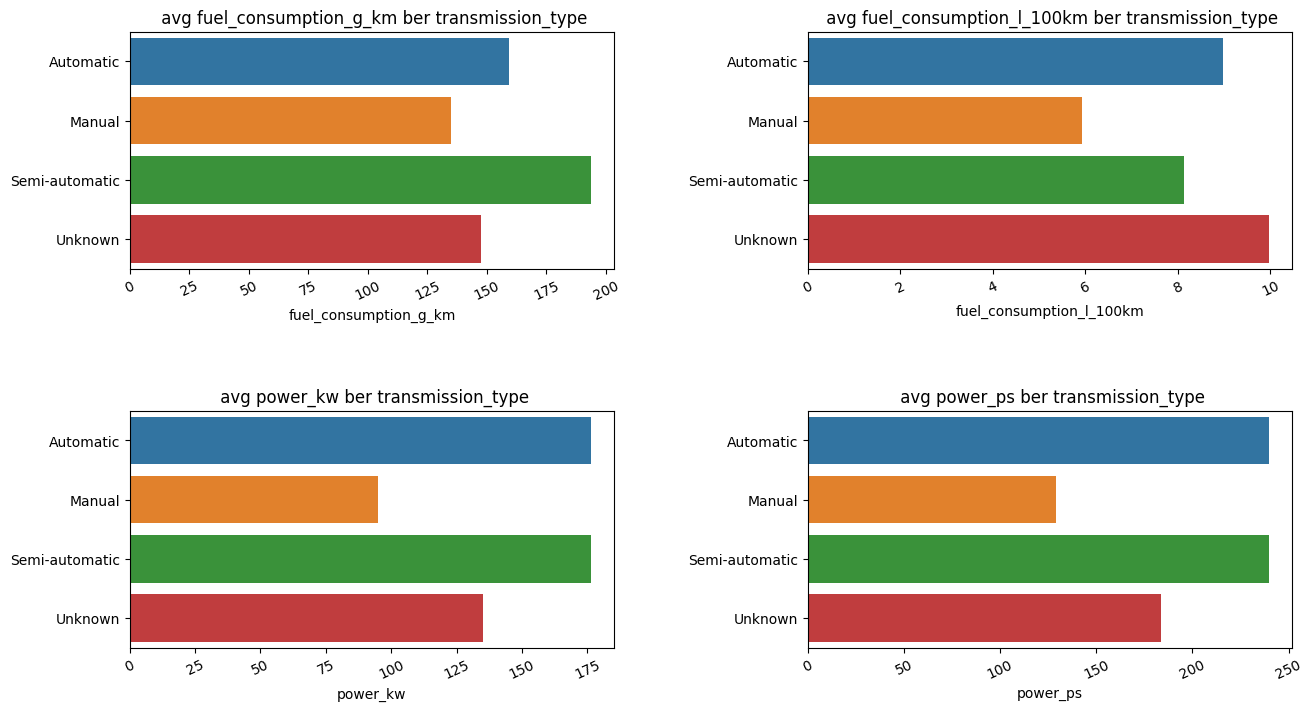

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))


s_axes=axes.flatten()
c_axes=0

for i in avargre_numirces_per_transmission_type.columns:
  sns.barplot(data=avargre_numirces_per_transmission_type,y=avargre_numirces_per_transmission_type.iloc[:,:0].index,x=i,ax=s_axes[c_axes]);
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
  s_axes[c_axes].set_title(f' avg {i} ber transmission_type')
  s_axes[c_axes].set_ylabel('')
  c_axes+=1

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()
plt.close()

In [34]:
avargre_numirces_per_fuel_type=data.pivot_table(values=['power_kw','power_ps','fuel_consumption_l_100km','fuel_consumption_g_km'],index=['fuel_type'],aggfunc='mean')
avargre_numirces_per_fuel_type

,fuel_consumption_g_km,fuel_consumption_l_100km,power_kw,power_ps
fuel_type,,,,
CNG,132.187805,5.784736,100.926829,137.219512
Diesel,145.064705,5.638317,138.193007,187.971127
Diesel Hybrid,137.838710,5.385004,145.217742,197.596774
Electric,187.845802,50.604137,170.881546,232.392352
Ethanol,199.800000,2.720000,198.600000,270.000000
Hybrid,75.492077,4.209950,149.715356,203.553443
Hydrogen,0.107143,1.371173,115.714286,157.214286
LPG,166.715434,8.334741,143.694534,195.454984
Other,79.639344,7.611947,146.950820,199.754098


/tmp/ipykernel_18/122601630.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/122601630.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/122601630.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
/tmp/ipykernel_18/122601630.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)


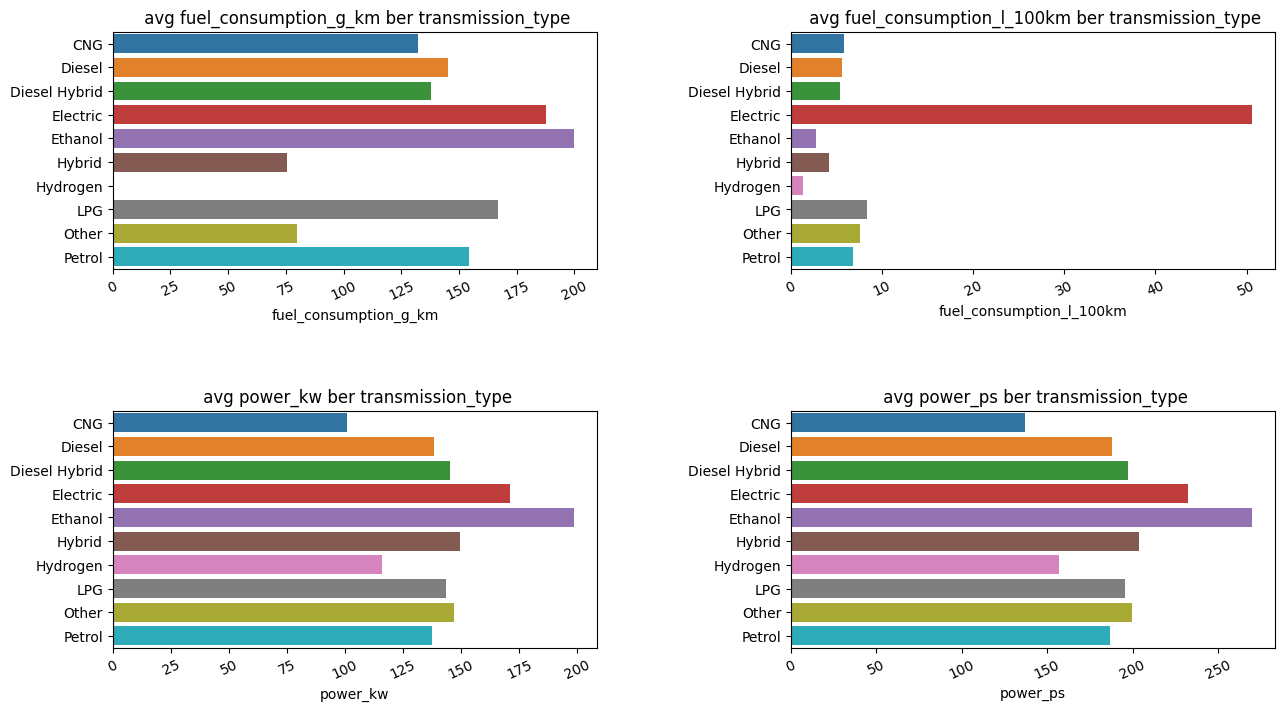

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))


s_axes=axes.flatten()
c_axes=0

for i in avargre_numirces_per_fuel_type.columns:
  sns.barplot(data=avargre_numirces_per_fuel_type,y=avargre_numirces_per_fuel_type.iloc[:,:0].index,x=i,ax=s_axes[c_axes]);
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=25)
  s_axes[c_axes].set_title(f' avg {i} ber transmission_type')
  s_axes[c_axes].set_ylabel('')
  c_axes+=1

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()
plt.close()

<Axes: xlabel='power_kw', ylabel='power_ps'>

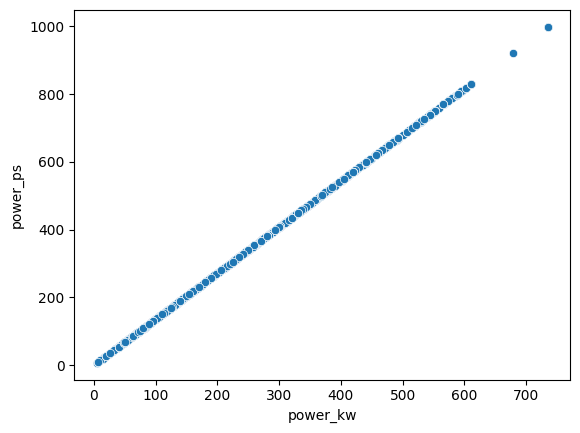

In [36]:
sns.scatterplot(x=data['power_kw'],y=data['power_ps'])

Text(0.5, 1.0, 'Power vs Fuel consumption(g/km)')

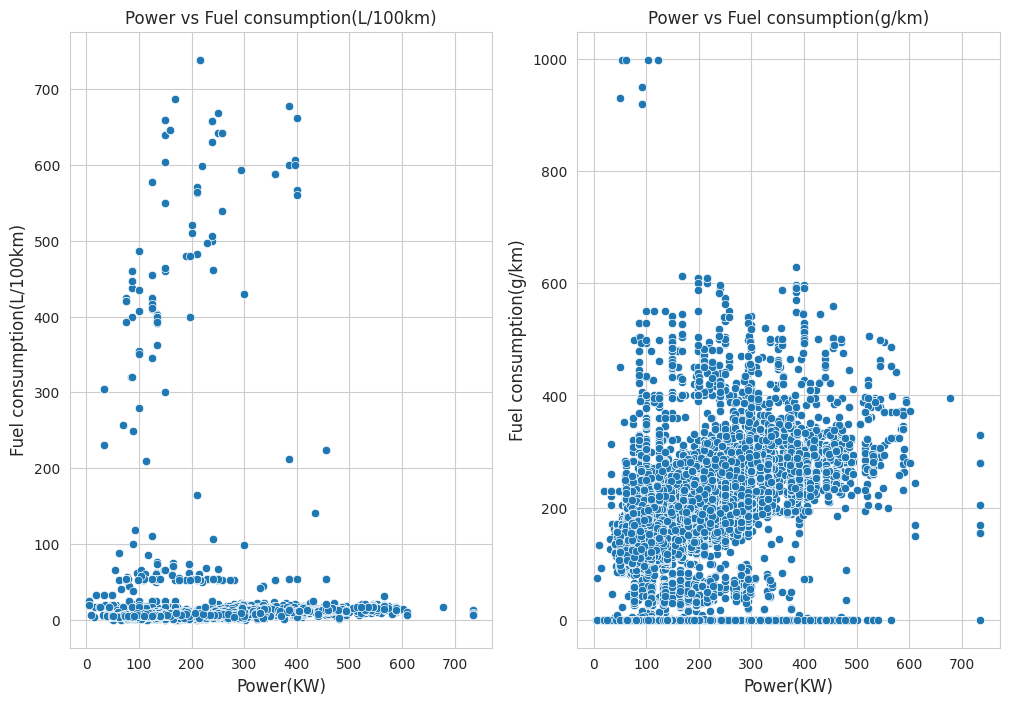

In [37]:
sns.set_style("whitegrid")

fig,axes=plt.subplots(ncols=2,nrows=1,figsize=((12,8)))

axes_f=axes.flatten()

sns.scatterplot(x=data['power_kw'],y=data['fuel_consumption_l_100km'],ax=axes_f[0])

axes_f[0].set_xlabel('Power(KW)', fontsize=12)
axes_f[0].set_ylabel('Fuel consumption(L/100km)', fontsize=12)
axes_f[0].set_title('Power vs Fuel consumption(L/100km)', fontsize=12)


sns.scatterplot(x=data['power_kw'],y=data['fuel_consumption_g_km'],ax=axes_f[1])
axes_f[1].set_xlabel('Power(KW)', fontsize=12)
axes_f[1].set_ylabel('Fuel consumption(g/km)', fontsize=12)
axes_f[1].set_title('Power vs Fuel consumption(g/km)', fontsize=12)

Text(0.5, 1.0, 'Power vs Fuel consumption(g/km)')

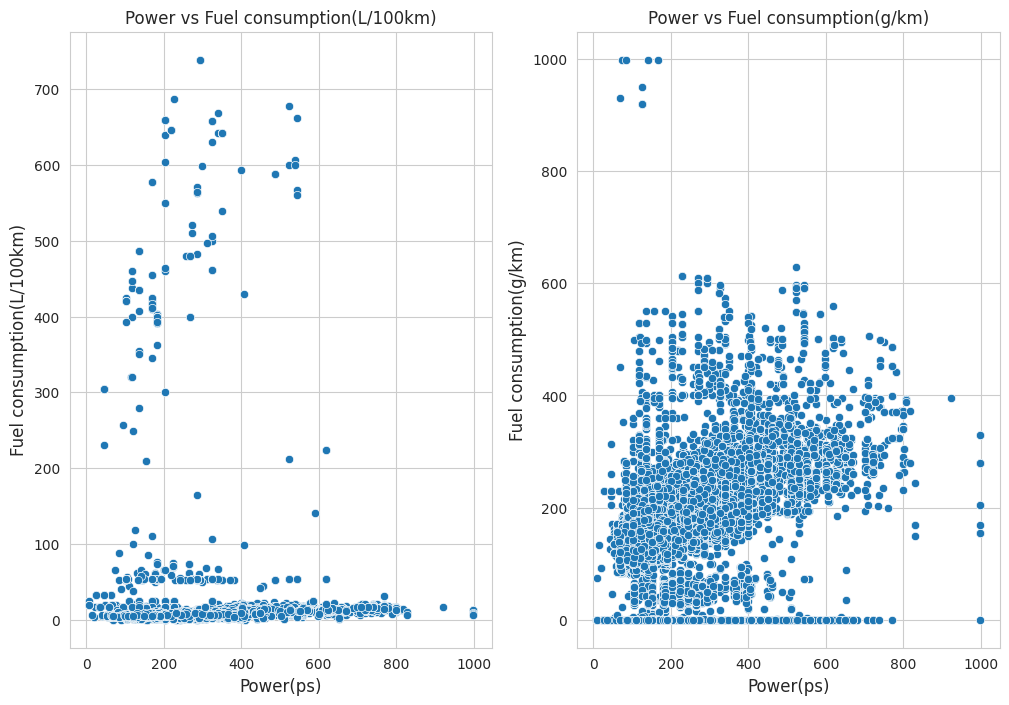

In [38]:
sns.set_style("whitegrid")

fig,axes=plt.subplots(ncols=2,nrows=1,figsize=((12,8)))

axes_f=axes.flatten()

sns.scatterplot(x=data['power_ps'],y=data['fuel_consumption_l_100km'],ax=axes_f[0])
axes_f[0].set_xlabel('Power(ps)', fontsize=12)
axes_f[0].set_ylabel('Fuel consumption(L/100km)', fontsize=12)
axes_f[0].set_title('Power vs Fuel consumption(L/100km)', fontsize=12)


sns.scatterplot(x=data['power_ps'],y=data['fuel_consumption_g_km'],ax=axes_f[1])
axes_f[1].set_xlabel('Power(ps)', fontsize=12)
axes_f[1].set_ylabel('Fuel consumption(g/km)', fontsize=12)
axes_f[1].set_title('Power vs Fuel consumption(g/km)', fontsize=12)

In [39]:
data['price_in_euro'] = data['price_in_euro'].astype(float)
Q1=data[['price_in_euro']].quantile(0.15)
Q3=data[['price_in_euro']].quantile(0.85)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

data=data[(data['price_in_euro']>=lower_bound.iloc[0]) & (data['price_in_euro']<=upper_bound.iloc[0])]



In [40]:
data['mileage_in_km'] = data['mileage_in_km'].astype(float)
Q1=data[['mileage_in_km']].quantile(0.15)
Q3=data[['mileage_in_km']].quantile(0.85)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

data=data[(data['mileage_in_km']>=lower_bound.iloc[0]) & (data['mileage_in_km']<=upper_bound.iloc[0])]

/tmp/ipykernel_18/347808667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage_in_km'] = data['mileage_in_km'].astype(float)


In [41]:
avargre_numirces_per_year=data.pivot_table(values=['price_in_euro'],index=['year'],aggfunc='mean')
avargre_numirces_per_year

,price_in_euro
year,
1995,8114.166667
1996,8412.800000
1997,9610.609756
1998,11016.150000
1999,8920.416058
2000,7737.170732
2001,8086.739316
2002,6000.057823
2003,7200.136259


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


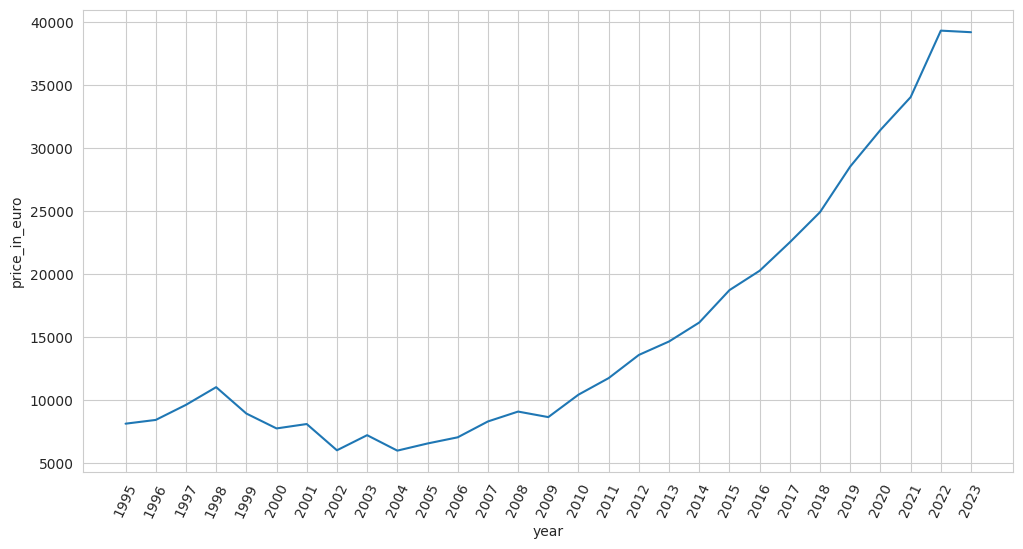

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avargre_numirces_per_year,x=avargre_numirces_per_year.iloc[:,:0].index,y='price_in_euro')
plt.xticks(avargre_numirces_per_year.index,rotation=65)
plt.show();

In [43]:
data.head(5)

,brand,model,color,month,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,5,2023,38490.0,140.0,190.0,Automatic,Hybrid,5.40000,124.0,100.0
1,hyundai,Hyundai i10,black,9,2018,11555.0,49.0,67.0,Manual,Petrol,4.60000,106.0,27782.0
2,audi,Audi Q4 e-tron,grey,5,2021,48886.0,125.0,170.0,Automatic,Electric,5.12963,0.0,4247.0
3,honda,Honda CR-V,red,7,2018,24490.0,114.0,155.0,Automatic,Petrol,7.50000,175.0,57000.0
4,kia,Kia Sportage,black,2,2023,34990.0,110.0,150.0,Manual,Petrol,5.90000,150.0,7500.0


In [44]:
avargre_numirces_per_brand_year=data.pivot_table(values=['price_in_euro'],index=['brand','year'],aggfunc='mean')
avargre_numirces_per_brand_year

price_in_euro
brand      year               
alfa-romeo 1995    3100.000000
           1996    6694.857143
           1997    6428.375000
           1998    5574.500000
           1999    4553.500000
...                        ...
mazda      2015   14905.761062
           2016   16224.412698
           2017   18715.289593
           2018   20807.762397
           2019   22639.958333

[473 rows x 1 columns]

/tmp/ipykernel_18/1728611042.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=avargre_numirces_per_brand_year.loc[i],x=avargre_numirces_per_brand_year.loc[i].iloc[:,:0].index,y='price_in_euro',ax=s_axes[c_axes],palette='Set3')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/1728611042.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=avargre_numirces_per_brand_year.loc[i],x=avargre_numirces_per

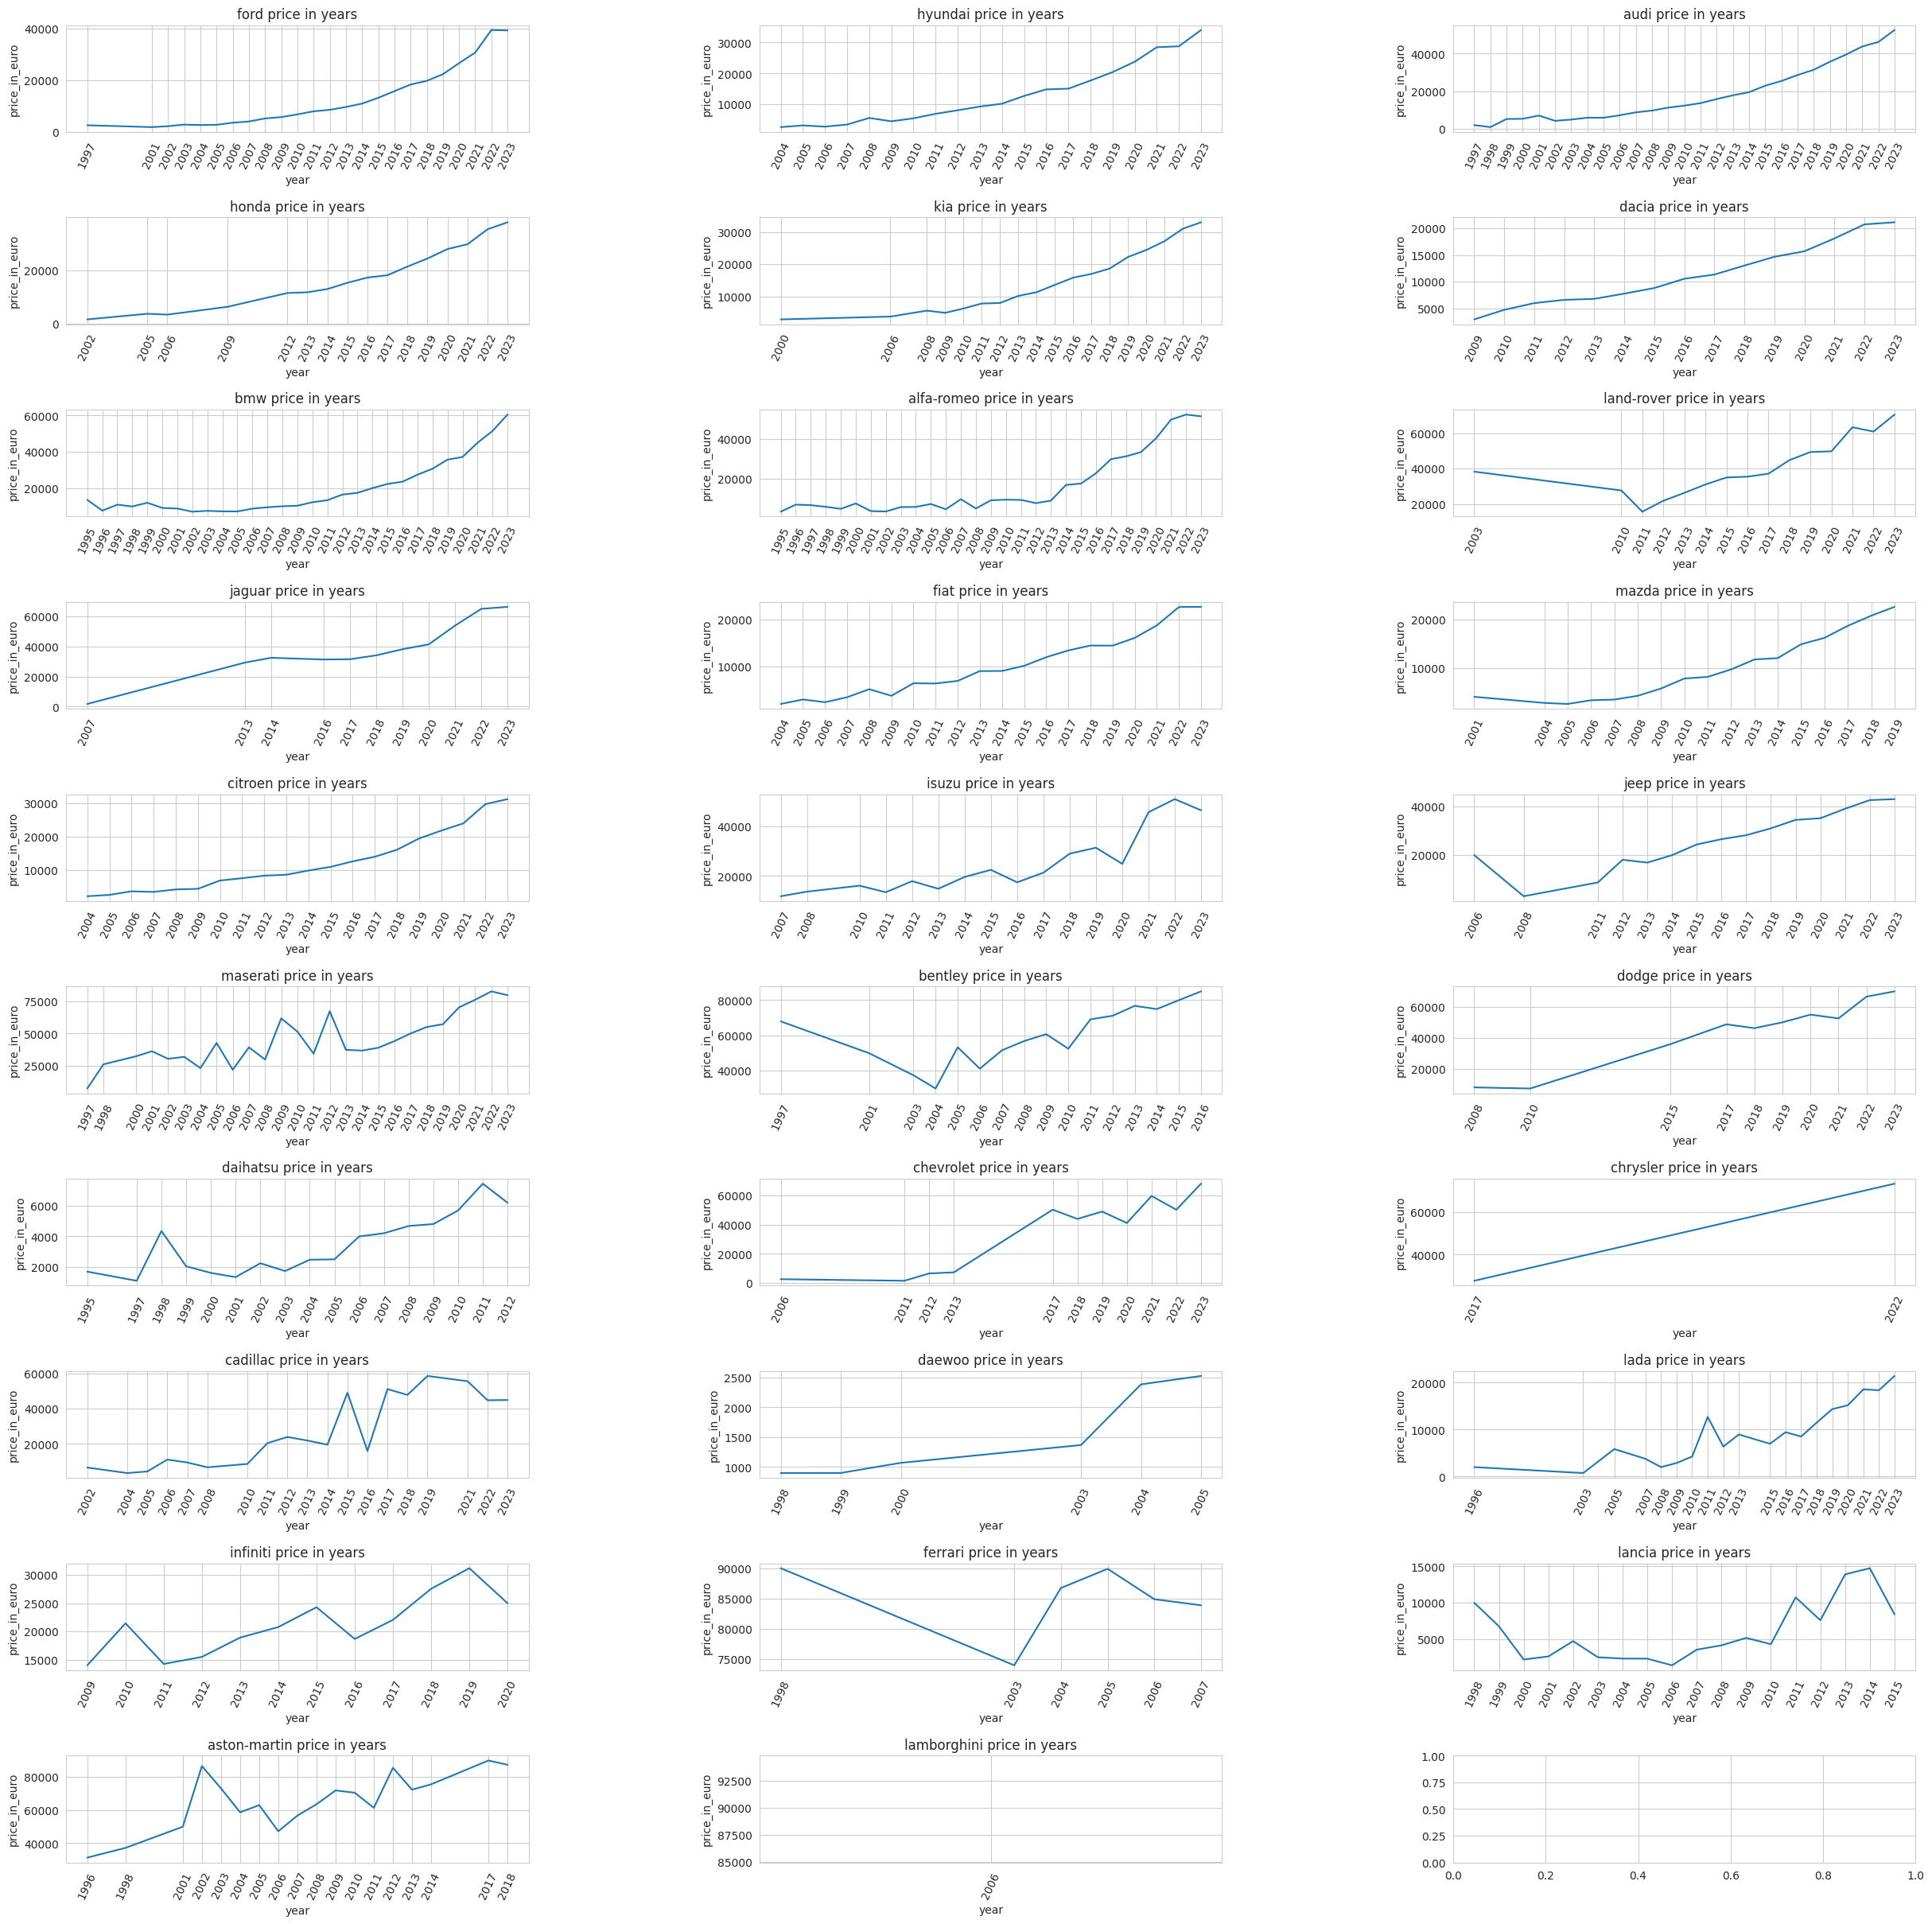

In [45]:
fig, axes = plt.subplots(ncols=3,nrows=int(len(data['brand'].unique())/3)+1, figsize=(30,30))
s_axes=axes.flatten()
c_axes=0

for i in data['brand'].unique():
  sns.lineplot(data=avargre_numirces_per_brand_year.loc[i],x=avargre_numirces_per_brand_year.loc[i].iloc[:,:0].index,y='price_in_euro',ax=s_axes[c_axes],palette='Set3')
  s_axes[c_axes].set_xticks(avargre_numirces_per_brand_year.loc[i].index.astype(int))  # Set x-ticks as integers
  s_axes[c_axes].tick_params(axis='x', rotation=65)
  s_axes[c_axes].set_title(f'{i} price in years')
  c_axes+=1


plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.show()




In [46]:
price_in_euro_per_brand=data.pivot_table(values=['price_in_euro'],index=['brand'],aggfunc='mean')
price_in_euro_per_brand

,price_in_euro
brand,
alfa-romeo,32103.318378
aston-martin,64867.517857
audi,27295.613094
bentley,62597.593220
bmw,24490.750653
cadillac,37551.375000
chevrolet,37644.968421
chrysler,70353.125000
citroen,18779.274905


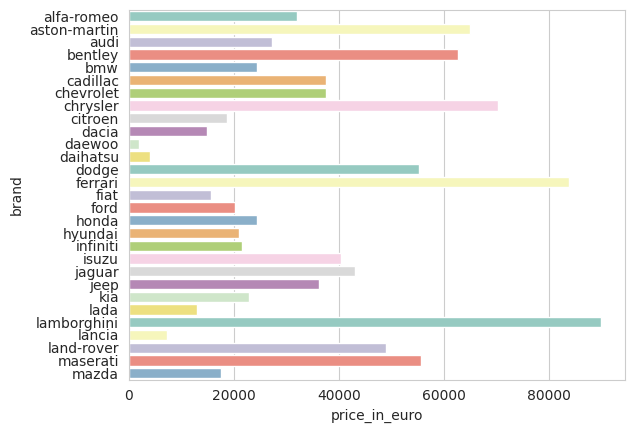

In [47]:
sns.barplot(data=price_in_euro_per_brand,y=price_in_euro_per_brand.iloc[:,:0].index,x='price_in_euro',palette='Set3');

In [48]:
price_in_euro_per_transmission_type=data.pivot_table(values=['price_in_euro'],index=['transmission_type'],aggfunc='mean')
price_in_euro_per_transmission_type

,price_in_euro
transmission_type,
Automatic,32262.084220
Manual,15505.438661
Semi-automatic,16229.762500
Unknown,21286.591160


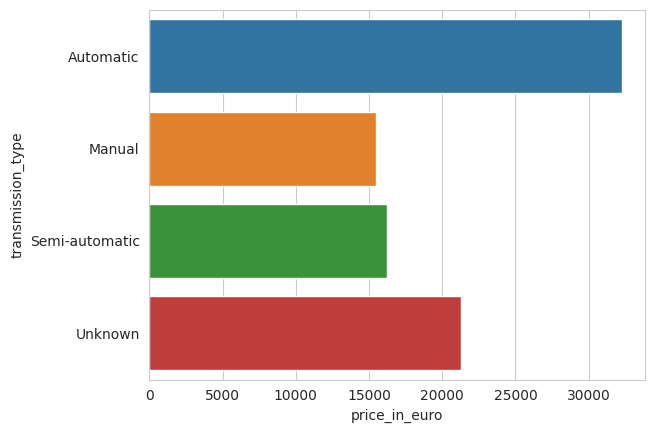

In [49]:
sns.barplot(data=price_in_euro_per_transmission_type,y=price_in_euro_per_transmission_type.iloc[:,:0].index,x='price_in_euro');

In [50]:
price_in_euro_per_fuel_type=data.pivot_table(values=['price_in_euro'],index=['fuel_type'],aggfunc='mean')
price_in_euro_per_fuel_type

,price_in_euro
fuel_type,
CNG,19658.536585
Diesel,25119.165779
Diesel Hybrid,40569.934959
Electric,39888.691840
Ethanol,18111.800000
Hybrid,36899.108363
Hydrogen,42499.821429
LPG,26448.774624
Other,31929.169492


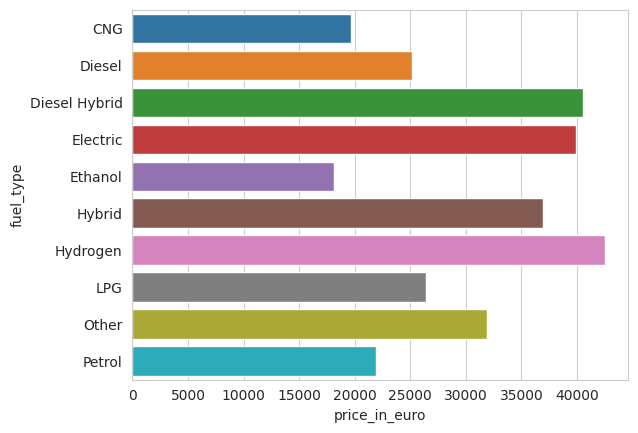

In [51]:
sns.barplot(data=price_in_euro_per_fuel_type,y=price_in_euro_per_fuel_type.iloc[:,:0].index,x='price_in_euro');

In [52]:
data.head(5)

,brand,model,color,month,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,5,2023,38490.0,140.0,190.0,Automatic,Hybrid,5.40000,124.0,100.0
1,hyundai,Hyundai i10,black,9,2018,11555.0,49.0,67.0,Manual,Petrol,4.60000,106.0,27782.0
2,audi,Audi Q4 e-tron,grey,5,2021,48886.0,125.0,170.0,Automatic,Electric,5.12963,0.0,4247.0
3,honda,Honda CR-V,red,7,2018,24490.0,114.0,155.0,Automatic,Petrol,7.50000,175.0,57000.0
4,kia,Kia Sportage,black,2,2023,34990.0,110.0,150.0,Manual,Petrol,5.90000,150.0,7500.0


In [53]:
from matplotlib.ticker import FuncFormatter

def formate_y(y,pos):
  return '{:,.0f}'.format(y)

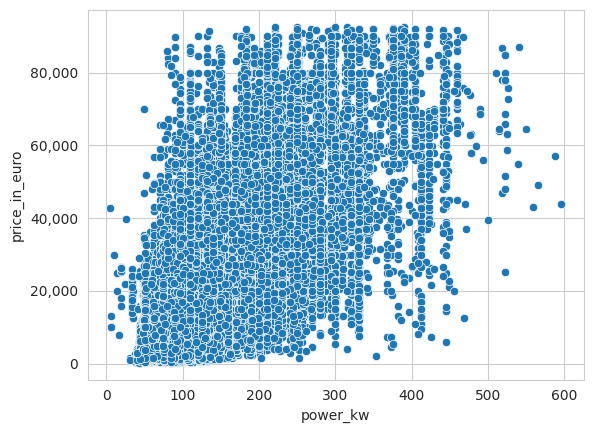

In [54]:
sns.scatterplot(x=data['power_kw'],y=data['price_in_euro'])
formatter = FuncFormatter(formate_y)
plt.gca().yaxis.set_major_formatter(formatter)

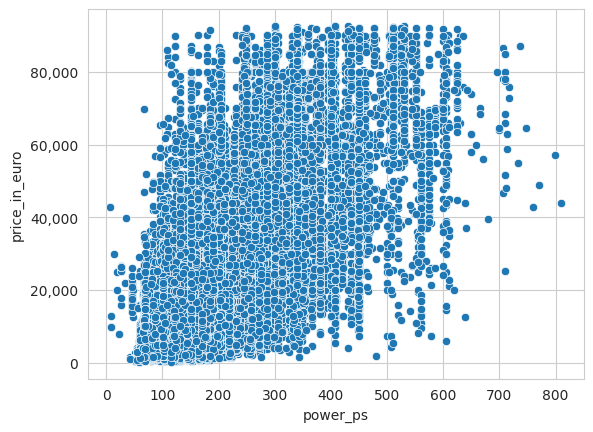

In [55]:
sns.scatterplot(x=data['power_ps'],y=data['price_in_euro'])
formatter = FuncFormatter(formate_y)
plt.gca().yaxis.set_major_formatter(formatter)

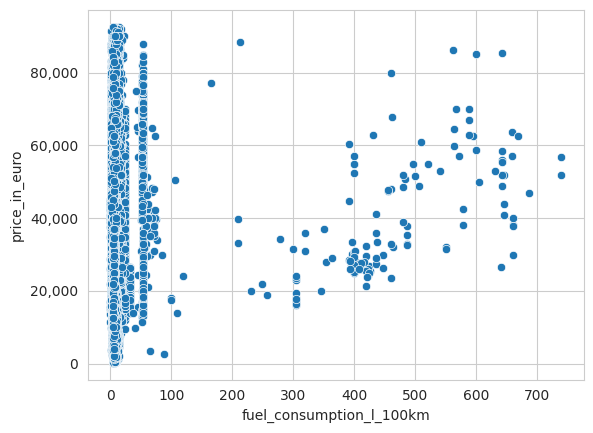

In [56]:
sns.scatterplot(x=data['fuel_consumption_l_100km'],y=data['price_in_euro'])
formatter = FuncFormatter(formate_y)
plt.gca().yaxis.set_major_formatter(formatter)

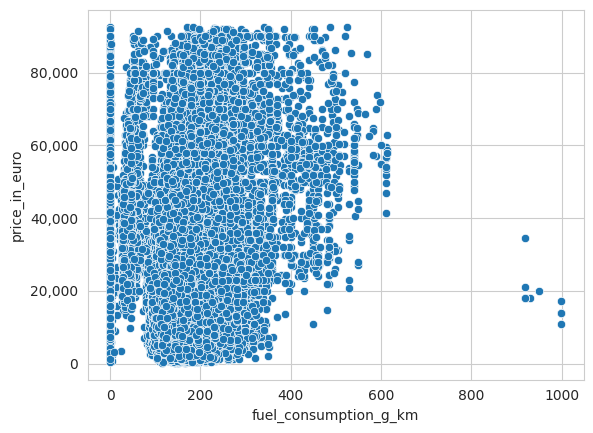

In [57]:
sns.scatterplot(x=data['fuel_consumption_g_km'],y=data['price_in_euro'])
formatter = FuncFormatter(formate_y)
plt.gca().yaxis.set_major_formatter(formatter)

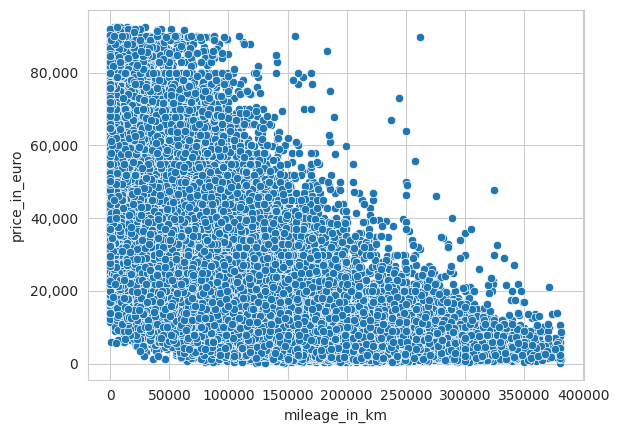

In [58]:
sns.scatterplot(x=data['mileage_in_km'],y=data['price_in_euro'])
formatter = FuncFormatter(formate_y)
plt.gca().yaxis.set_major_formatter(formatter)

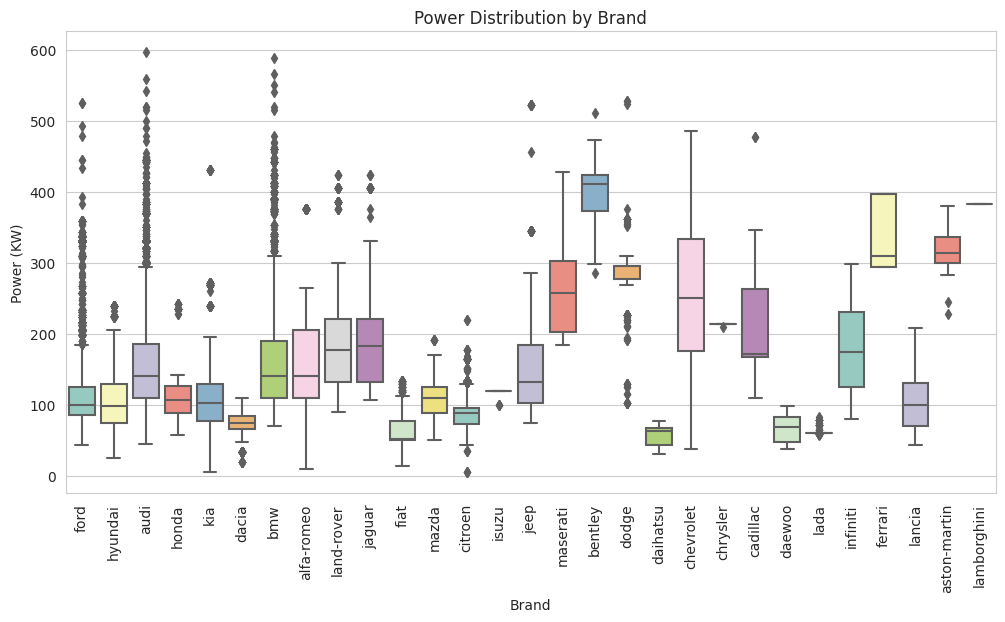

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='power_kw', data=data,palette='Set3')
plt.xlabel('Brand')
plt.ylabel('Power (KW)')
plt.title('Power Distribution by Brand')
plt.xticks(rotation=90)
plt.show()

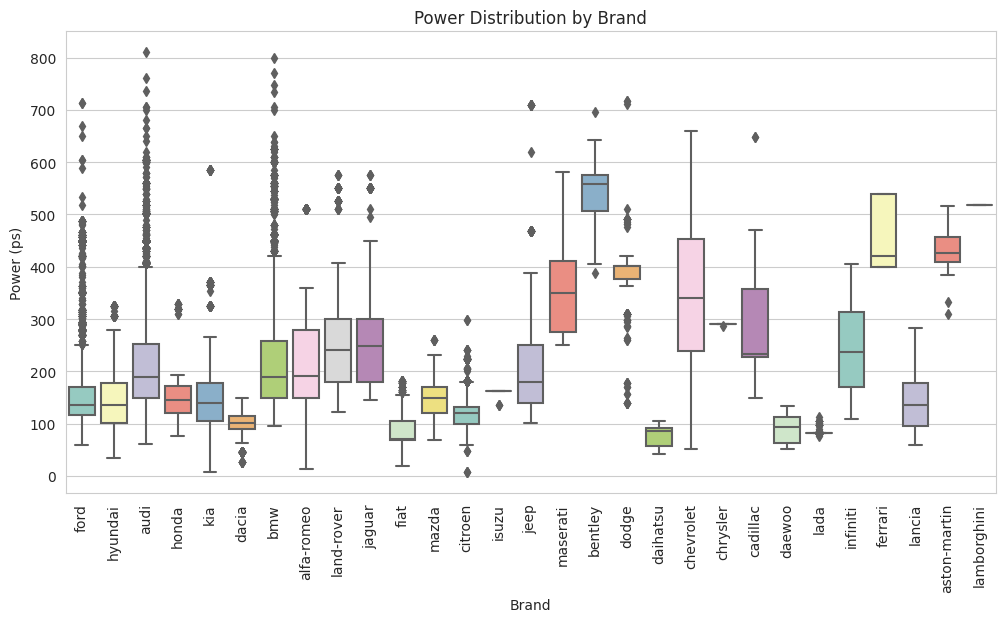

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='power_ps', data=data,palette='Set3')
plt.xlabel('Brand')
plt.ylabel('Power (ps)')
plt.title('Power Distribution by Brand')
plt.xticks(rotation=90)
plt.show()

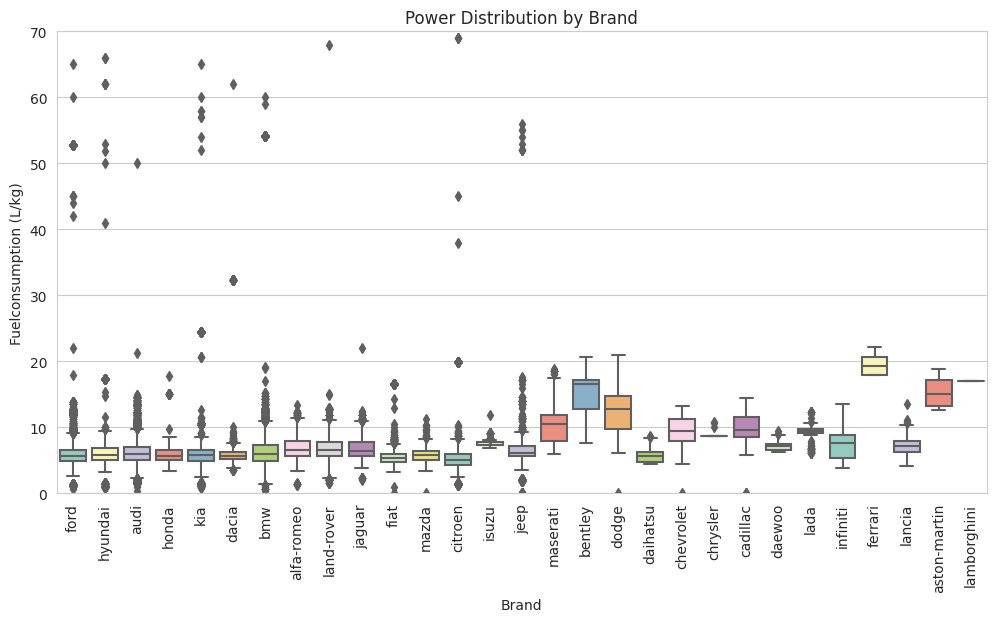

In [61]:
plt.figure(figsize=(12, 6))
ax=sns.boxplot(x='brand', y='fuel_consumption_l_100km', data=data,palette='Set3')
plt.xlabel('Brand')
plt.ylabel('Fuelconsumption (L/kg)')
plt.title('Power Distribution by Brand')
plt.xticks(rotation=90)
ax.set_ylim(0,70)
plt.show()

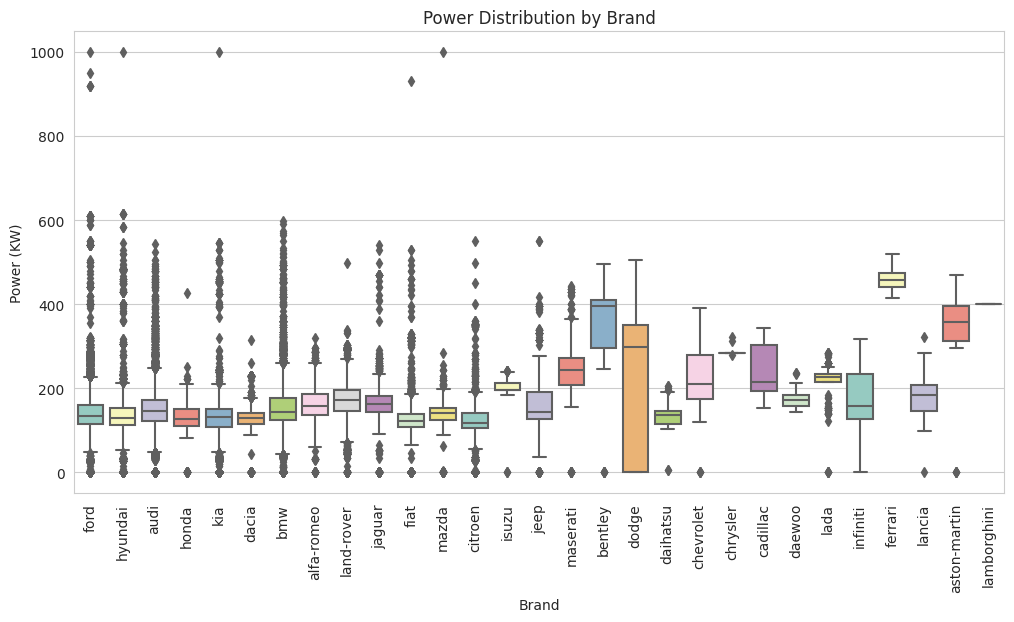

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='fuel_consumption_g_km', data=data,palette='Set3')
plt.xlabel('Brand')
plt.ylabel('Power (KW)')
plt.title('Power Distribution by Brand')
plt.xticks(rotation=90)
plt.show()

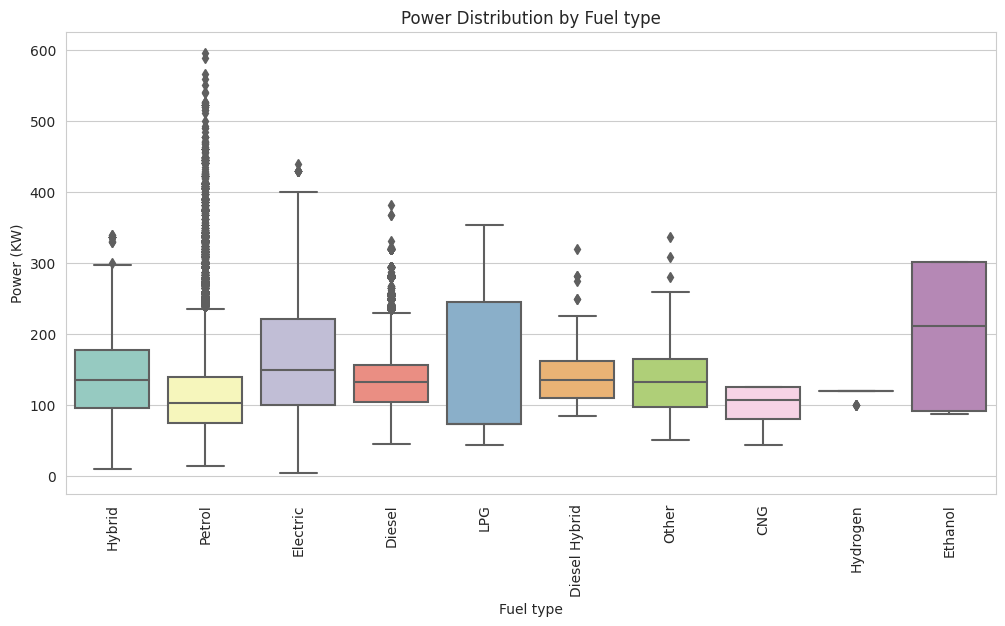

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y='power_kw', data=data,palette='Set3')
plt.xlabel('Fuel type')
plt.ylabel('Power (KW)')
plt.title('Power Distribution by Fuel type')
plt.xticks(rotation=90)
plt.show()

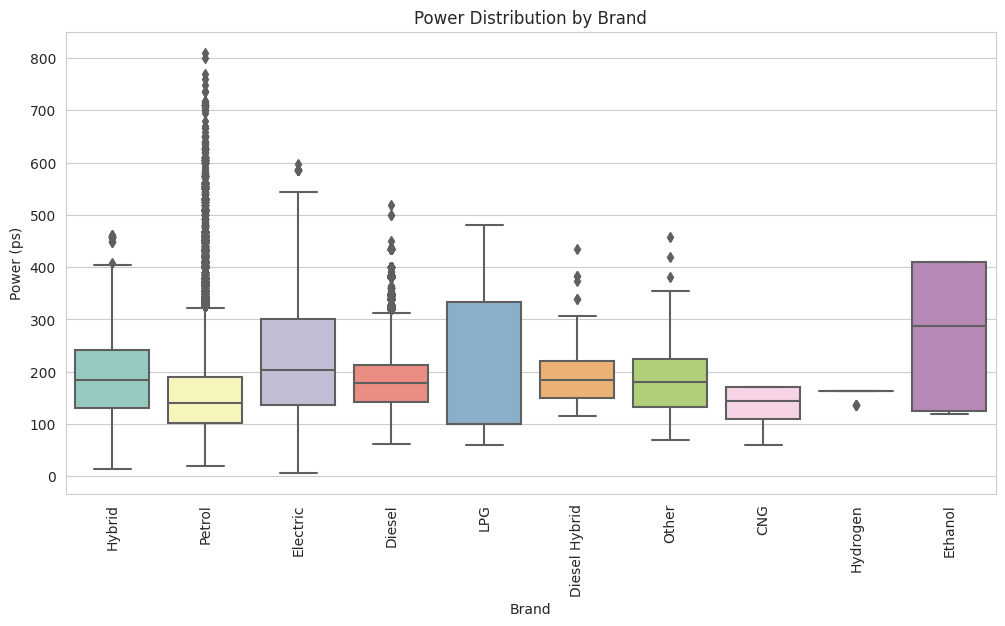

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y='power_ps', data=data,palette='Set3')
plt.xlabel('Brand')
plt.ylabel('Power (ps)')
plt.title('Power Distribution by Brand')
plt.xticks(rotation=90)
plt.show()

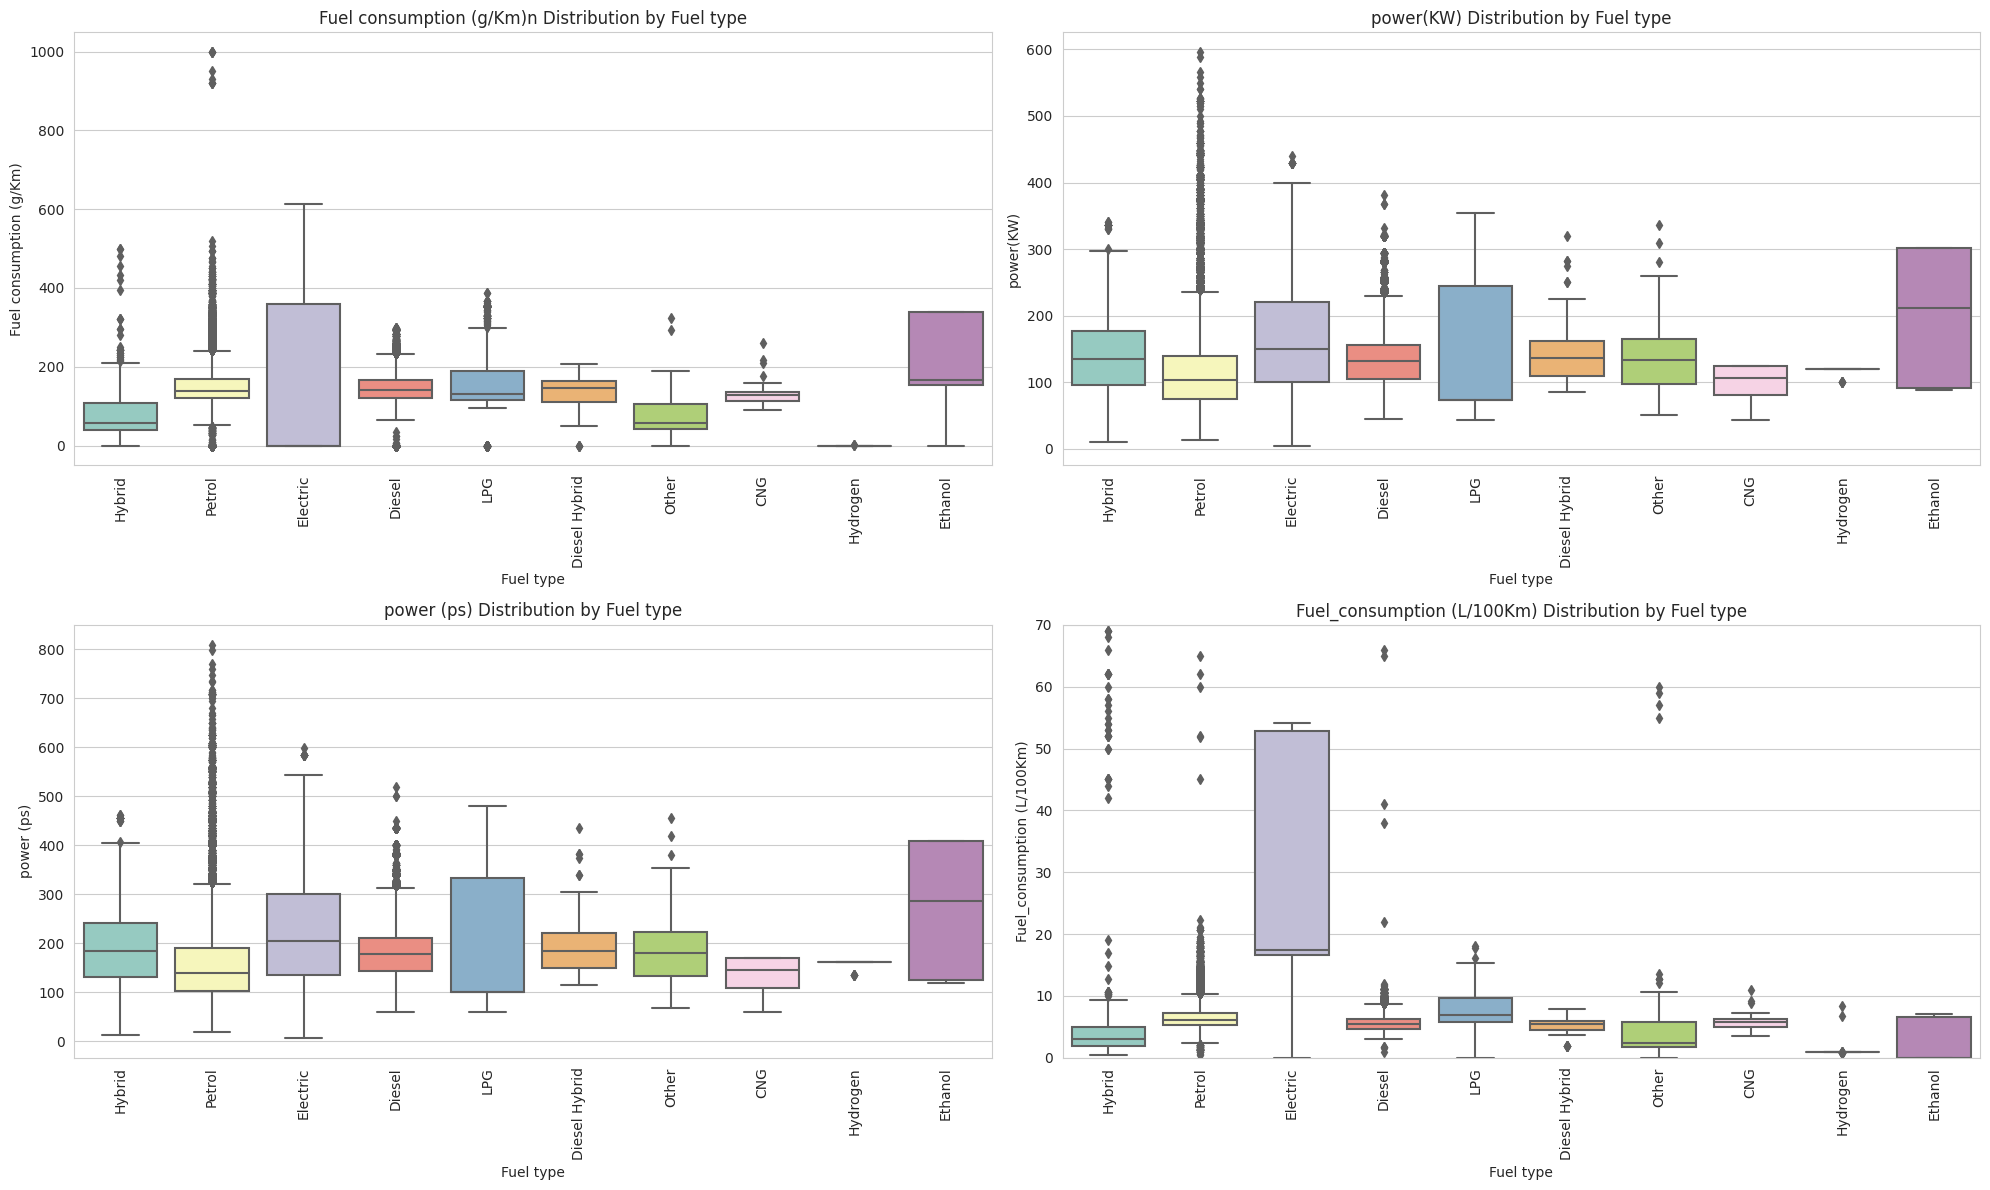

In [65]:
fig,axes=plt.subplots(ncols=2,nrows=2,figsize=((20,12)))

axes_f=axes.flatten()


sns.boxplot(x='fuel_type', y='fuel_consumption_g_km', data=data,palette='Set3',ax=axes_f[0])
axes_f[0].set_xlabel('Fuel type')
axes_f[0].set_ylabel('Fuel consumption (g/Km)')
axes_f[0].set_title('Fuel consumption (g/Km)n Distribution by Fuel type')
axes_f[0].set_xticklabels(axes_f[0].get_xticklabels(),rotation=90)


sns.boxplot(x='fuel_type', y='power_kw', data=data,palette='Set3',ax=axes_f[1])
axes_f[1].set_xlabel('Fuel type')
axes_f[1].set_ylabel('power(KW)')
axes_f[1].set_title('power(KW) Distribution by Fuel type')
axes_f[1].set_xticklabels(axes_f[1].get_xticklabels(),rotation=90)




sns.boxplot(x='fuel_type', y='power_ps', data=data,palette='Set3',ax=axes_f[2])
axes_f[2].set_xlabel('Fuel type')
axes_f[2].set_ylabel('power (ps)')
axes_f[2].set_title('power (ps) Distribution by Fuel type')
axes_f[2].set_xticklabels(axes_f[1].get_xticklabels(),rotation=90)



sns.boxplot(x='fuel_type', y='fuel_consumption_l_100km', data=data,palette='Set3',ax=axes_f[3])
axes_f[3].set_xlabel('Fuel type')
axes_f[3].set_ylabel('Fuel_consumption (L/100Km)')
axes_f[3].set_title('Fuel_consumption (L/100Km) Distribution by Fuel type')
axes_f[3].set_xticklabels(axes_f[3].get_xticklabels(),rotation=90)
axes_f[3].set_ylim(0,70)


plt.tight_layout()
plt.show()

**Modeling**

In [66]:
X=data.drop(columns='price_in_euro',axis=1)
y=data['price_in_euro']

In [67]:
numiric_features=X.select_dtypes(exclude="object").columns
categorical_features=X.select_dtypes(include="object").columns

In [68]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_trasform=StandardScaler()
cat_trasform=OrdinalEncoder()


preprocessor=ColumnTransformer(
    [
        ("OrdinalEncoder",cat_trasform,categorical_features),
        ("StanderdScaler",num_trasform,numiric_features)
    ]
)


In [69]:
X=preprocessor.fit_transform(X)
X.shape

(78160, 12)

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [72]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((58620, 12), (19540, 12), (58620, 1), (19540, 1))

In [73]:
def evaluate_model(target,predicted):
  mae=mean_absolute_error(target,predicted)
  mse=mean_squared_error(target,predicted)
  rmse=np.sqrt(mean_squared_error(target,predicted))
  r2_square=r2_score(target,predicted)
  return mae,mse,rmse,r2_square

In [74]:
!pip install catboost

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [76]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(models)):
  model=list(models.values())[i]
  model.fit(X_train,y_train)

  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)

  model_train_mea,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)

  model_test_mea,model_test_mse,model_test_rmea,model_test_r2=evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mea))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mea))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')




Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7792.5107
- Mean Absolute Error: 5341.9484
- R2 Score: 0.7735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7792.5107
- Mean Absolute Error: 5385.9889
- R2 Score: 0.7646


Lasso
Model performance for Training set
- Root Mean Squared Error: 7793.1018
- Mean Absolute Error: 5342.0570
- R2 Score: 0.7735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7793.1018
- Mean Absolute Error: 5386.1436
- R2 Score: 0.7645


Ridge
Model performance for Training set
- Root Mean Squared Error: 7792.7427
- Mean Absolute Error: 5341.9683
- R2 Score: 0.7735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7792.7427
- Mean Absolute Error: 5385.9847
- R2 Score: 0.7646


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5070.9112
- Mean Absolute Error: 3090.9429


/tmp/ipykernel_18/1742150841.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1973.1924
- Mean Absolute Error: 1099.3939
- R2 Score: 0.9855
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1973.1924
- Mean Absolute Error: 2918.2155
- R2 Score: 0.8977


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 4085.4085
- Mean Absolute Error: 2489.8381
- R2 Score: 0.9377
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4085.4085
- Mean Absolute Error: 2895.1187
- R2 Score: 0.9015


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 4388.5416
- Mean Absolute Error: 2632.8263
- R2 Score: 0.9282
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4388.5416
- Mean Absolute Error: 2844.4872
- R2 Score: 0.9054




/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 9616.0816
- Mean Absolute Error: 7825.6229
- R2 Score: 0.6551
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9616.0816
- Mean Absolute Error: 7906.9775
- R2 Score: 0.6400


